In [2]:
a = None
if a is not None:
    print("H")

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [38]:
def pad_image(image):
    H, W, _ = image.shape

    larger_dim = max(H, W)

    if larger_dim % 1024 != 0:
        larger_dim = (larger_dim // 1024 + 1) * 1024

    # Calculate padding for both dimensions
    pad_h = max(0, larger_dim - H)
    pad_w = max(0, larger_dim - W)

    # Pad the image
    padded_image = np.pad(image, ((0, pad_h), (0, pad_w), (0, 0)), mode='constant', constant_values=0)

    return padded_image

def resize_image(image):
    factor = 1 / (image.shape[0] // 1024)
    new_height = int(image.shape[0] * factor)
    new_width = int(image.shape[1] * factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))

    return resized_image, factor

def resize_pad_save_image(path, image):
    padded_image = pad_image(image)
    resized_padded_image, factor = resize_image(padded_image)
    cv2.imwrite(path, resized_padded_image)
    
    return factor
    

In [36]:
data_path = ""
oc_types = ["ORCHID-100X-OSCC-MD", "ORCHID-100X-OSCC-PD", "ORCHID-100X-OSCC-WD", "ORCHID-100X-OSMF"]

factor_info = {}
for oc_type in oc_types:
    for data_split in ["train", "test", "validation"]:
        folder_path = os.path.join(data_path, oc_type, data_split)
        for patient_id in os.listdir(folder_path):
            image_paths = glob.glob(os.path.join(folder_path, patient_id) + "*/.png")
            
            for image_path in image_paths:
                # (read -> pad -> resize -> save) image
                image = cv2.imread(image_path)
                factor = resize_pad_save_image(image_path, image)

                # Save factor info
                factor_info[image_path] = factor

0

In [43]:
os.path.join("a", "b")

'a/b'

In [30]:
image = cv2.imread("/media/chs.gpu/oralcancer/PTMWaDmA.png")
padded_image = pad_image(image)
resized_padded_image = resize_image(padded_image, 0.5)

In [31]:
image.shape

(1536, 2048, 3)

In [32]:
resize_pad_save_image(path="/media/chs.gpu/oralcancer/PTMWaDmA.png", image=image)

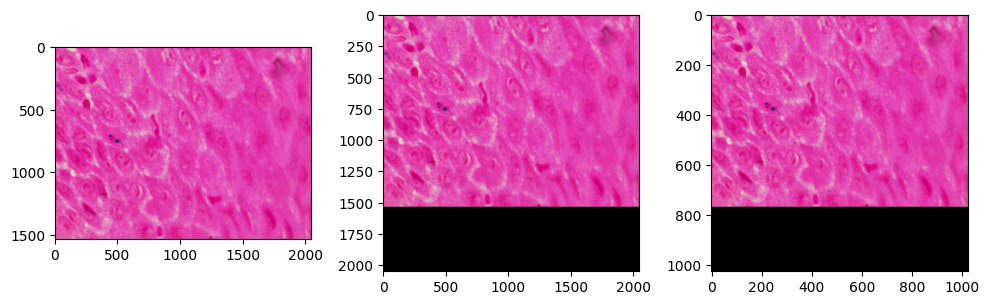

In [18]:
fig, axes = plt.subplots(1,3,figsize=(10,10))
axes[0].imshow(image)
axes[1].imshow(padded_image)
axes[2].imshow(resized_padded_image)

plt.tight_layout()
plt.show()

In [15]:
image.shape, padded_image.shape

((1536, 2048, 3), (2048, 2048, 3))